1. [Откройте файл с данными и изучите общую информацию.](#paragraph2)
2. [Подготовьте данные.](#paragraph3)
3. [Изучите и проверьте данные](#paragraph4)
4. [Изучите воронку событий](#paragraph5)
5. [Изучите результаты эксперимента](#paragraph6)

## Откройте файл с данными и изучите общую информацию<a name="paragraph2"></a>

In [153]:
#импортировали библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import math as mth

In [154]:
#открыли файл
df = pd.read_csv('../Study/Sborniy2.csv',sep = '\t')
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [155]:
#проверили на наличие ошибки
df['ExpId'].unique()

array([246, 248, 247])

## Подготовьте данные<a name="paragraph3"></a>

In [156]:
#сделали строчные буквы в названии колонок 
df.columns = df.columns.str.lower()

In [157]:
#посмотрим на количество пропущенных значений
df.isna().sum()

eventname         0
deviceidhash      0
eventtimestamp    0
expid             0
dtype: int64

In [158]:
#посмотрим на количество дубликатов
df.duplicated().sum()

413

In [159]:
#удалим дубликаты
df = df.drop_duplicates()

In [160]:
#посмотрим на общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   eventname       243713 non-null  object
 1   deviceidhash    243713 non-null  int64 
 2   eventtimestamp  243713 non-null  int64 
 3   expid           243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


In [161]:
#поменяем тип c unix 
df = df.copy()
df['eventtimestamp'] = df['eventtimestamp'].astype('datetime64[s]')

In [162]:
#выделили дату
df['date'] = df['eventtimestamp'].dt.date
df

,eventname,deviceidhash,eventtimestamp,expid,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


### Вывод
Таблица была приведена к читаемому виду, проведена проверка на пропуски, выявлены и удалены дубликаты, изменен тип данных.

## Изучите и проверьте данные<a name="paragraph4"></a>

Сколько всего событий в логе?

In [163]:
#проверили количество  мероприятий
df['eventname'].nunique()

5

Сколько всего пользователей в логе?

In [164]:
#проверим количество пользователей
df['deviceidhash'].nunique()

7551

Сколько в среднем событий приходится на пользователя?

In [165]:
#сколько событий на одного пользователя
id_event = df.groupby('deviceidhash')['eventname'].count().reset_index()

In [166]:
mean_event = id_event['eventname'].mean()
print('В среднем на одного пользователя приходится:', mean_event)

В среднем на одного пользователя приходится: 32.27559263673685


Данными за какой период вы располагаете?<br/>
Найдите максимальную и минимальную дату.

In [167]:
df['date'].min()

datetime.date(2019, 7, 25)

In [168]:
df['date'].max()

datetime.date(2019, 8, 7)

In [169]:
print('Данные за период с 25.07.2019 по 2019.08.07')

Данные за период с 25.07.2019 по 2019.08.07


Постройте гистограмму по дате и времени.<br/> 
Можно ли быть уверенным, что у вас одинаково полные данные за весь период?<br/>
Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные».<br/>
Определите, с какого момента данные полные и отбросьте более старые.<br/>
Данными за какой период времени вы располагаете на самом деле?


No handles with labels found to put in legend.


Text(0, 0.5, 'Кол-во людей')

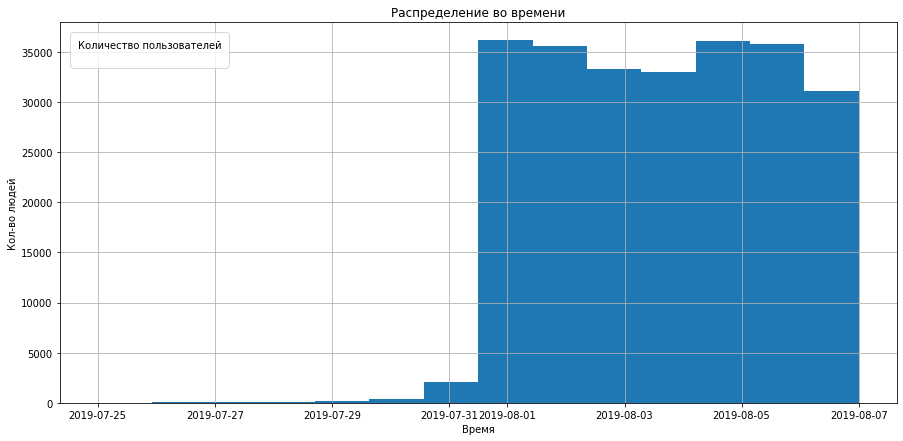

In [170]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#построим гистограмму
df['date'].hist(figsize=(15,7),bins=14)
    

plt.legend(prop={'size': 20}, title = 'Количество пользователей')
plt.title('Распределение во времени')
plt.xlabel('Время')
plt.ylabel('Кол-во людей')

Построив гистограмму можно с уверенностью сказать, что мы обладаем данными за период с 1ого августа по 7ое. Соответственно период исследования можно обозначить недельный.

In [171]:
#найдем месяц события
df['month'] = df['eventtimestamp'].dt.month
df

,eventname,deviceidhash,eventtimestamp,expid,date,month
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,7
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,7
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,7
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,7
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,7
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,8
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,8
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,8
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,8


In [172]:
#выделим только те, где месяц 8
df1 = df.query('month == 8')

Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [173]:
#найдем разницу между размерами датасетов
a = len(df) - len(df1)

In [174]:
print('Потерянных данных:', a)

Потерянных данных: 2826


In [175]:
b = df['deviceidhash'].nunique() - df1['deviceidhash'].nunique()

In [176]:
print('Потерянных пользователей:', b)

Потерянных пользователей: 17


In [177]:
c = (b / df['deviceidhash'].nunique())*100

In [178]:
print('Доля потерянных пользователей в %:', c)

Доля потерянных пользователей в %: 0.22513574361011784


In [179]:
df = df1.copy()

Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [180]:
#проверим количесвто тестируемых групп
df['expid'].unique()

array([246, 247, 248])

In [181]:
df.groupby('expid').agg({'deviceidhash': 'nunique'}).reset_index()

,expid,deviceidhash
0,246,2484
1,247,2513
2,248,2537


## Изучите воронку событий<a name="paragraph5"></a>


Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [182]:
#посмотрим на события в воронке
df['eventname'].unique()

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

In [183]:
#узнаем кол-во появления каждого события
event = df.groupby('eventname')['deviceidhash'].count().reset_index().sort_values(by='deviceidhash',ascending=False)

Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [184]:
event

,eventname,deviceidhash
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [185]:
#узнаем сколько пользователей выполняло действий
users_count = df.groupby('eventname').agg({'deviceidhash': 'nunique'})

In [186]:
#соеденим табоицы
event = event.merge(users_count,on='eventname',how='left')
event.columns = ['eventname','action','unique_users']

In [187]:
#посчтаем долю от числа уник пользоватлей
event['percent_users_total'] = ((event['unique_users'] / df['deviceidhash'].nunique()) * 100).round(2)
event

,eventname,action,unique_users,percent_users_total
0,MainScreenAppear,117328,7419,98.47
1,OffersScreenAppear,46333,4593,60.96
2,CartScreenAppear,42303,3734,49.56
3,PaymentScreenSuccessful,33918,3539,46.97
4,Tutorial,1005,840,11.15


Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

События выстраиваются в цепочку: MainScreenAppear - OffersScreenAppear - CartScreenAppear - PaymentScreenSuccessful<br/>

А вот туториал может предлагаться либо вначале, либо уже на главном экране, да и действие не выглядит обязательным, поэтому его в воронке мы рассматривать не будем.

In [188]:
#создали список с нужными нам событиями
event_name = ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful']

In [189]:
#учли только необходимые события
event = event.query('eventname in @event_name')

По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [190]:
#строим воронку
fig = go.Figure(go.Funnel(
    y = event['eventname'],
    x = event['unique_users'],
    textinfo = "value+percent previous+percent initial"
    ))
fig.show()

На каком шаге теряете больше всего пользователей?

Четко видно, что после 1ого шага отсеается большинство людей. 38% респондентов -  это больше 1/3 от всего количества.

## Изучите результаты эксперимента<a name="paragraph6"></a>

Сколько пользователей в каждой экспериментальной группе?

In [191]:
#уберем события с инструкцией
da = df.query('eventname in @event_name')
da

,eventname,deviceidhash,eventtimestamp,expid,date,month
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,8
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,8
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,8
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,8
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01,8
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,8
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,8
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,8
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,8


In [192]:
al = da.groupby('expid').agg({'deviceidhash': 'nunique'}).reset_index()
al.columns = ['group','users']

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247

In [193]:
#посчитаем сколько пользователей побывало на каждом шагу
users_by_event = da.pivot_table(index = 'expid', 
                                columns = 'eventname', 
                                values = 'deviceidhash', 
                                aggfunc = 'nunique').reset_index()
users_by_event.columns = ['group', 'CartScreenAppear', 'MainScreenAppear', 'OffersScreenAppear',
       'PaymentScreenSuccessful']

In [194]:
users_by_event

,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful
0,246,1266,2450,1542,1200
1,247,1238,2476,1520,1158
2,248,1230,2493,1531,1181


In [195]:
al

,group,users
0,246,2483
1,247,2512
2,248,2535


In [196]:
#функция по поиску pvalue
alpha = .05 
def find_stats(successes1,successes2,trials1,trials2,alpha):
    successes = np.array([successes1,successes2])
    trials = np.array([trials1,trials2])
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными") 

In [197]:
# AA MainScreenAppear
# h0 - разницу между долями пользователей, совершивших событие "Главный экран" в группах А/А нет
# h1 - разницу между долями пользователей, совершивших событие "Главный экран" в группах А/А есть
find_stats(users_by_event.iloc[0][2],
           users_by_event.iloc[1][2],
           al.iloc[0][1], al.iloc[1][1],
           alpha)

p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [198]:
# AA OffersScreenAppear
# h0 - разницу между долями пользователей, совершивших событие оплаты в группах А/А нет
# h1 - разницу между долями пользователей, совершивших событие оплаты в группах А/А есть
find_stats(users_by_event.iloc[0][3],
           users_by_event.iloc[1][3],
           al.iloc[0][1], al.iloc[1][1],
           alpha)

p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [199]:
# AA CartScreenAppear
# h0 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/А нет
# h1 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/А есть
find_stats(users_by_event.iloc[0][1],
           users_by_event.iloc[1][1],
           al.iloc[0][1], al.iloc[1][1],
           alpha)

p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [200]:
# AA PaymentScreenSuccessful
# h0 - разницу между долями пользователей, совершивших событие успешной оплаты в группах А/А нет
# h1 - разницу между долями пользователей, совершивших событие успешной оплаты в группах А/А есть
find_stats(users_by_event.iloc[0][4],
           users_by_event.iloc[1][4],
           al.iloc[0][1], al.iloc[1][1],
           alpha)

p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

Открытие главного экрана - самое популярное событие

In [201]:
users_by_event = users_by_event.merge(al,on='group')

In [202]:
users_by_event['share_by_mainscreen'] = users_by_event['MainScreenAppear'] / users_by_event['users']

Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [203]:
# A1 B CartScreenAppear
# h0 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/В есть
find_stats(users_by_event.iloc[0][1],
           users_by_event.iloc[2][1],
           al.iloc[0][1], al.iloc[2][1],
           alpha)

p-значение:  0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [204]:
# A1 B MainScreenAppear
# h0 - разницу между долями пользователей, совершивших событие "Главнное меню" в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие "Главнное меню" в группах А/В есть
find_stats(users_by_event.iloc[0][2],
           users_by_event.iloc[2][2],
           al.iloc[0][1], al.iloc[2][1],
           alpha)

p-значение:  0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [205]:
# A1 B OffersScreenAppear
# h0 - разницу между долями пользователей, совершивших событие предложения оплаты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие предложения оплаты в группах А/В есть
find_stats(users_by_event.iloc[0][3],
           users_by_event.iloc[2][3],
           al.iloc[0][1], al.iloc[2][1],
           alpha)

p-значение:  0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [206]:
# A1 B PaymentScreenSuccessful
# h0 - разницу между долями пользователей, совершивших событие успешной оплаты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие успешной оплаты в группах А/В есть
find_stats(users_by_event.iloc[0][4],
           users_by_event.iloc[2][4],
           al.iloc[0][1], al.iloc[2][1],
           alpha)

p-значение:  0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между группами А и В на каждом шаге различий не налюдается, а значиит значимого влияния шрифт на польщователей не оказал

In [207]:
# A2 B CartScreenAppear
# h0 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/В есть
find_stats(users_by_event.iloc[1][1],
           users_by_event.iloc[2][1],
           al.iloc[1][1], al.iloc[2][1],
           alpha)

p-значение:  0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [208]:
# A2 B MainScreenAppear
# h0 - рразницу между долями пользователей, совершивших событие главное меню в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие главное меню в группах А/В есть
find_stats(users_by_event.iloc[1][2],
           users_by_event.iloc[2][2],
           al.iloc[1][1], al.iloc[2][1],
           alpha)

p-значение:  0.5194964354051703
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [209]:
# A2 B OffersScreenAppear
# h0 - разницы между статистическими критериями на этапе предложения оплаты в группах А/В нет
# h1 - разницы между статистическими критериями на этапе предложения оплаты в группах А/В есть
find_stats(users_by_event.iloc[1][3],
           users_by_event.iloc[2][3],
           al.iloc[1][1], al.iloc[2][1],
           alpha)

p-значение:  0.9333751305879443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [210]:
# A2 B PaymentScreenSuccessful
# h0 - разницу между долями пользователей, совершивших событие успешной оплаты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие  успешной оплаты в группах А/В есть
find_stats(users_by_event.iloc[1][4],
           users_by_event.iloc[2][4],
           al.iloc[1][1], al.iloc[2][1],
           alpha)

p-значение:  0.7275718682261119
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между группами А2 и В на каждом шаге различий не налюдается, а значиит значимого влияния шрифт на польщователей не оказал

In [211]:
al

,group,users
0,246,2483
1,247,2512
2,248,2535


In [212]:
new_row = pd.DataFrame({'group':'A/A', 
                        'users':al.iloc[1][1]+al.iloc[2][1]},
                       index =[0])
new_row

,group,users
0,A/A,5047


In [213]:
al = pd.concat([al, new_row]).reset_index(drop = True)
al

,group,users
0,246,2483
1,247,2512
2,248,2535
3,A/A,5047


In [214]:
new_row = pd.DataFrame({'group':'A/A', 
                        'CartScreenAppear':users_by_event.iloc[1][1]+users_by_event.iloc[2][1],
                        'MainScreenAppear':users_by_event.iloc[1][2]+users_by_event.iloc[2][2],
                        'OffersScreenAppear':users_by_event.iloc[1][3]+users_by_event.iloc[2][3],
                        'PaymentScreenSuccessful':users_by_event.iloc[1][4]+users_by_event.iloc[2][4],
                        'users':users_by_event.iloc[1][5]+users_by_event.iloc[2][5],
                        'share_by_mainscreen':users_by_event.iloc[1][6]+users_by_event.iloc[2][6]},
                       index =[0])
new_row

,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,users,share_by_mainscreen
0,A/A,2468.0,4969.0,3051.0,2339.0,5047.0,1.969101


In [215]:
users_by_event = pd.concat([users_by_event, new_row]).reset_index(drop = True)
users_by_event

,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,users,share_by_mainscreen
0,246,1266.0,2450.0,1542.0,1200.0,2483.0,0.986710
1,247,1238.0,2476.0,1520.0,1158.0,2512.0,0.985669
2,248,1230.0,2493.0,1531.0,1181.0,2535.0,0.983432
3,A/A,2468.0,4969.0,3051.0,2339.0,5047.0,1.969101


In [216]:
users_by_event

,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,users,share_by_mainscreen
0,246,1266.0,2450.0,1542.0,1200.0,2483.0,0.986710
1,247,1238.0,2476.0,1520.0,1158.0,2512.0,0.985669
2,248,1230.0,2493.0,1531.0,1181.0,2535.0,0.983432
3,A/A,2468.0,4969.0,3051.0,2339.0,5047.0,1.969101


In [217]:
# A+A B CartScreenAppear
# h0 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие заполнения данных карты в группах А/В есть
find_stats(users_by_event.iloc[3][1],
           users_by_event.iloc[2][1],
           al.iloc[3][1], al.iloc[2][1],
           alpha)

p-значение:  0.7550532435389599
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [218]:
# A+A B MainScreenAppear
# h0 - рразницу между долями пользователей, совершивших событие главное меню в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие главное меню в группах А/В есть
find_stats(users_by_event.iloc[3][2],
           users_by_event.iloc[2][2],
           al.iloc[3][1], al.iloc[2][1],
           alpha)

p-значение:  0.7140386014919398
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [219]:
# A+A B OffersScreenAppear
# h0 - разницы между статистическими критериями на этапе предложения оплаты в группах А/В нет
# h1 - разницы между статистическими критериями на этапе предложения оплаты в группах А/В есть
find_stats(users_by_event.iloc[3][3],
           users_by_event.iloc[2][3],
           al.iloc[3][1], al.iloc[2][1],
           alpha)

p-значение:  0.9616243218993505
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [220]:
# A+A B PaymentScreenSuccessful
# h0 - разницу между долями пользователей, совершивших событие успешной оплаты в группах А/В нет
# h1 - разницу между долями пользователей, совершивших событие  успешной оплаты в группах А/В есть
find_stats(users_by_event.iloc[3][4],
           users_by_event.iloc[2][4],
           al.iloc[3][1], al.iloc[2][1],
           alpha)

p-значение:  0.8410978296641471
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По итогу группа AA и группа В на каждом шаге не имеют статистической разности, а значит изменение шрифта никак не сказалось на пользователях

Автоматизация процесса поиска p-value

In [221]:
def check_groups(group1, group2, df_users_by_event, event_list, total_col, alpha):
     # выделяем строку для первой группы
    data_group1 = df_users_by_event[df_users_by_event['group'] == group1]
     # выделяем строку для второй группы
    data_group2 = df_users_by_event[df_users_by_event['group'] == group2]
    
    print('Сравнение для групп:', group1, 'и', group2)
    
    for event in event_list:  # цикл по событиям
        print('Событие', event)
        find_stats(data_group1[event], data_group2[event], data_group1[total_col], data_group2[total_col], alpha)

In [222]:
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
check_groups(246, 247, users_by_event, event_list, 'users', 0.05)

Сравнение для групп: 246 и 247
Событие MainScreenAppear
p-значение:  [0.75267034]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear
p-значение:  [0.24786097]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear
p-значение:  [0.22867644]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful
p-значение:  [0.11446628]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [223]:
check_groups(246, 248, users_by_event, event_list, 'users', 0.05)

Сравнение для групп: 246 и 248
Событие MainScreenAppear
p-значение:  [0.33871141]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear
p-значение:  [0.21442477]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear
p-значение:  [0.08067368]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful
p-значение:  [0.21693034]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [224]:
check_groups(247, 248, users_by_event, event_list, 'users', 0.05)

Сравнение для групп: 247 и 248
Событие MainScreenAppear
p-значение:  [0.51949644]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear
p-значение:  [0.93337513]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear
p-значение:  [0.58782846]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful
p-значение:  [0.72757187]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [225]:
check_groups('A/A', 248, users_by_event, event_list, 'users', 0.05)

Сравнение для групп: A/A и 248
Событие MainScreenAppear
p-значение:  [0.7140386]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие OffersScreenAppear
p-значение:  [0.96162432]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие CartScreenAppear
p-значение:  [0.75505324]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие PaymentScreenSuccessful
p-значение:  [0.84109783]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.


Всего у меня сделано 16 проверок - 4 между А/А, и по 4 между А1/В,А2/В + 4 между АА/В

критерий альфа брал стандартный по прошлым урокам = 0,5

Вывод: в работе мы рассмотрели группы А/А/В. У групп А/А были одинаковые условия и служили они для проверки точности резульатов. У группы В был изменен шрифт. Целью работы было определить как сильно влиял на пользователей шрифт. После проведения предобработки данных, выстраивания их в целостную цепочку можно сказать:
1. 38% отваливаются после первого шага
2. Разницы в поведении пользователей при смене шрифта - нет
3. Чуть меньше 8к респондентов
4. 5 событий и 4 из них в цепочке
5. срок теста 1 неделя